In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\tanma\Desktop\socbiz\Grad Project\Meesho_Orders.csv")

C:\Users\tanma\AppData\Local\Temp\ipykernel_30756\551793478.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\tanma\Desktop\socbiz\Grad Project\Meesho_Orders.csv")


In [3]:
df.columns

Index(['ReasonforCreditEntry', 'SubOrderNo', 'OrderDate', 'CustomerState',
       'ProductName', 'SKU', 'Size', 'Quantity', 'SupplierListedPrice',
       'SupplierDiscountedPrice', 'PacketId', 'account_id', 'create_time',
       'update_time'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86329 entries, 0 to 86328
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ReasonforCreditEntry     86327 non-null  object 
 1   SubOrderNo               86327 non-null  object 
 2   OrderDate                86327 non-null  object 
 3   CustomerState            43885 non-null  object 
 4   ProductName              86327 non-null  object 
 5   SKU                      86326 non-null  object 
 6   Size                     86327 non-null  object 
 7   Quantity                 86328 non-null  float64
 8   SupplierListedPrice      86328 non-null  float64
 9   SupplierDiscountedPrice  86329 non-null  object 
 10  PacketId                 0 non-null      float64
 11  account_id               86328 non-null  float64
 12  create_time              86328 non-null  object 
 13  update_time              86328 non-null  object 
dtypes: float64(4), object(

In [41]:
df.isnull().sum()

ReasonforCreditEntry           2
SubOrderNo                     2
OrderDate                      2
CustomerState              42444
ProductName                    2
SKU                            3
Size                           2
Quantity                       1
SupplierListedPrice            1
SupplierDiscountedPrice        1
PacketId                   86329
account_id                     1
create_time                    1
update_time                    1
month                          2
DayOfWeek                      2
Revenue                        1
Month                          2
DiscountPercentage             2
TimeToFulfillment              1
Season                         0
dtype: int64

In [6]:
df['OrderDate']=pd.to_datetime(df['OrderDate'])
month_map={ 1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['month']=df['OrderDate'].dt.month.map(month_map)
print(df['month'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 86329 entries, 0 to 86328
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
86327 non-null  object
dtypes: object(1)
memory usage: 674.6+ KB
None


C:\Users\tanma\AppData\Local\Temp\ipykernel_30756\2162309520.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['OrderDate']=pd.to_datetime(df['OrderDate'])


In [7]:
df['ReasonforCreditEntry'].unique()

array([nan, 'DELIVERED', 'Delivered', 'CANCELLED', 'Shipped',
       'RTO_COMPLETE', 'LOST', 'RTO_LOCKED', 'RTO_DELIVERY_FAILED',
       'SHIPPED', 'RTO_INITIATED', 'Cancelled', 'DOOR_STEP_EXCHANGED',
       'RTO_OFD', 'PENDING', 'READY_TO_SHIP'], dtype=object)

In [8]:
df['ReasonforCreditEntry'].value_counts()

ReasonforCreditEntry
Delivered              42036
DELIVERED              30354
CANCELLED               6326
RTO_COMPLETE            6313
Shipped                  347
SHIPPED                  342
RTO_LOCKED               127
LOST                     112
READY_TO_SHIP             88
RTO_INITIATED             87
PENDING                   66
Cancelled                 59
RTO_OFD                   37
DOOR_STEP_EXCHANGED       26
RTO_DELIVERY_FAILED        7
Name: count, dtype: int64

In [11]:
df['SupplierDiscountedPrice']=pd.to_numeric(df['SupplierDiscountedPrice'],errors='coerce')
df[df['SupplierDiscountedPrice']<df['SupplierListedPrice']].shape[0]

21940

In [12]:
df['create_time'] = pd.to_datetime(df['create_time'])
df['update_time'] = pd.to_datetime(df['update_time'])



C:\Users\tanma\AppData\Local\Temp\ipykernel_30756\2804989317.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['create_time'] = pd.to_datetime(df['create_time'])
C:\Users\tanma\AppData\Local\Temp\ipykernel_30756\2804989317.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['update_time'] = pd.to_datetime(df['update_time'])


In [13]:
credit_reasons = df['ReasonforCreditEntry'].value_counts()
print("Credit Reasons:\n", credit_reasons)
sub_orders = df['SubOrderNo'].nunique()
print(f'Total number of sub-orders: {sub_orders}')



Credit Reasons:
 ReasonforCreditEntry
Delivered              42036
DELIVERED              30354
CANCELLED               6326
RTO_COMPLETE            6313
Shipped                  347
SHIPPED                  342
RTO_LOCKED               127
LOST                     112
READY_TO_SHIP             88
RTO_INITIATED             87
PENDING                   66
Cancelled                 59
RTO_OFD                   37
DOOR_STEP_EXCHANGED       26
RTO_DELIVERY_FAILED        7
Name: count, dtype: int64
Total number of sub-orders: 86282


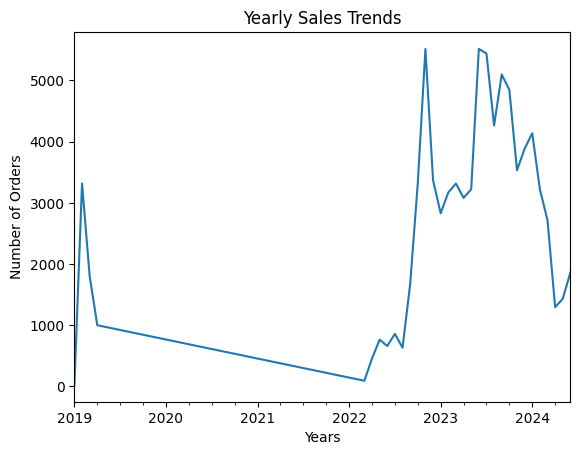

In [14]:
sales_trends = df.groupby(df['OrderDate'].dt.to_period('M')).size()
sales_trends.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Number of Orders')
plt.title('Yearly Sales Trends')
plt.show()



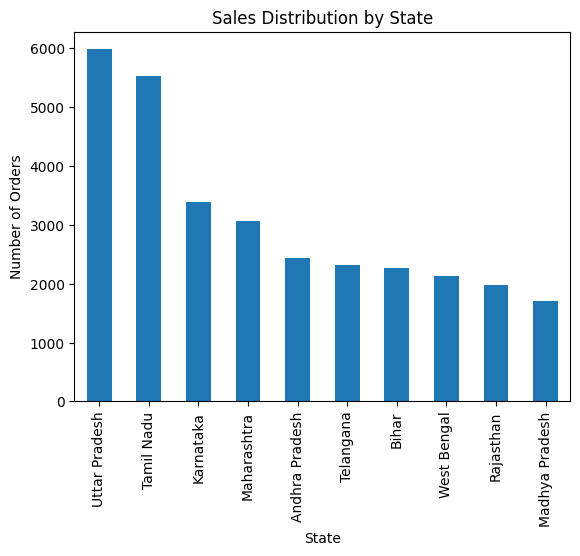

In [15]:
state_distribution = df['CustomerState'].value_counts().head(10)
state_distribution.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Sales Distribution by State')
plt.show()



In [16]:
# Product performance
product_performance = df['ProductName'].value_counts()
print("Top 10 Products:\n", product_performance.head(10))



Top 10 Products:
 ProductName
Boxn Stainless Steel Electric Kettle 2 Liter Design for Hot Water, Tea, Coffee, Milk, Rice and Other Multi Purpose Cooking Food Kettle                                                  8004
Furshine Universal Single Seater Sofa Cover Big Elasticity Cover for Couch Flexible Stretch Sofa Slipcover Single Seater, Blend Geometric 90-145cm                                      5602
Furshine Triple Seater Sofa Cover Big Elasticity, Protective, Flexible Stretch, Spandex & Polyester Sofa Slipcover                                                                      5377
Furshine Universal Triple Seater Sofa Cover Big Elasticity Cover for Couch Flexible Stretch Sofa Slipcover Single Seater, Blend geometric 185-230cm                                     3089
Furshine Universal Single Seater Sofa Cover Big Elasticity Cover for Couch Flexible Stretch Sofa Slipcover Single Seater, Blue Diamond 90-145cm                                         2578
Furshine Universal Triple

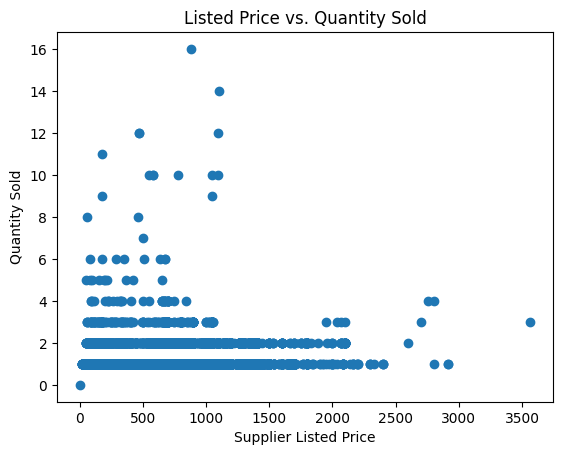

In [40]:
plt.scatter(df['SupplierListedPrice'], df['Quantity'])
plt.xlabel('Supplier Listed Price')
plt.ylabel('Quantity Sold')
plt.title('Listed Price vs. Quantity Sold')
plt.show()




In [23]:
df['Revenue']=df['Quantity']*df['SupplierDiscountedPrice']
print(df['Revenue'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 86329 entries, 0 to 86328
Series name: Revenue
Non-Null Count  Dtype  
--------------  -----  
86328 non-null  float64
dtypes: float64(1)
memory usage: 674.6 KB
None


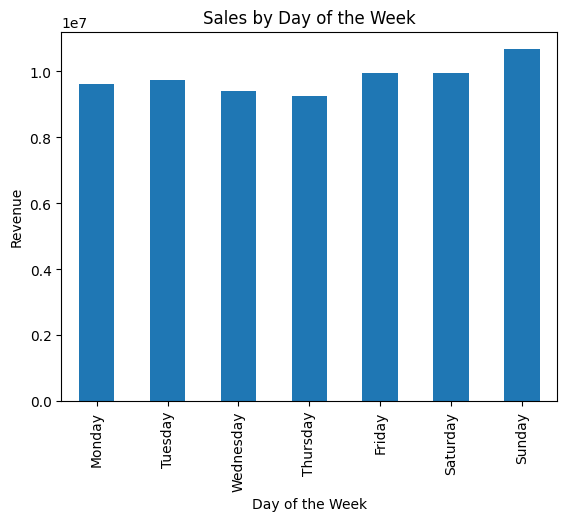

In [24]:
df['DayOfWeek'] = df['OrderDate'].dt.day_name()
sales_by_day = df.groupby('DayOfWeek')['Revenue'].sum()
sales_by_day = sales_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sales_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.title('Sales by Day of the Week')
plt.show()


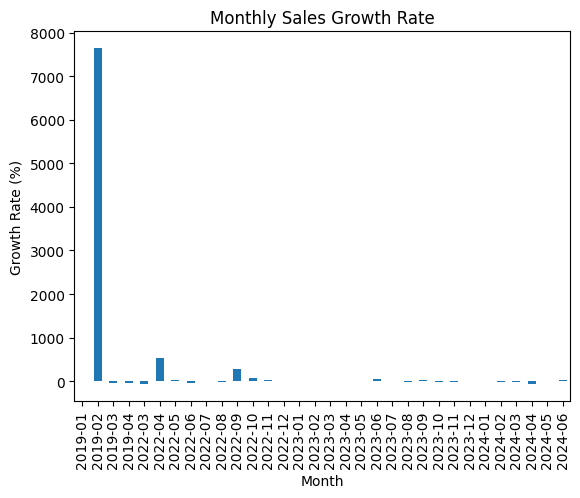

In [25]:
monthly_revenue = df.groupby(df['OrderDate'].dt.to_period('M'))['Revenue'].sum()
monthly_growth_rate = monthly_revenue.pct_change() * 100
monthly_growth_rate.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.title('Monthly Sales Growth Rate')
plt.show()

In [26]:
order_revenue = df.groupby('SubOrderNo')['Revenue'].sum()
aov = order_revenue.mean()
print("average order value",aov)

average order value 795.5488950186598


In [27]:
customer_revenue = df.groupby('account_id')['Revenue'].sum()
customer_orders = df.groupby('account_id')['SubOrderNo'].nunique()
avg_order_value_per_customer = customer_revenue / customer_orders
clv = avg_order_value_per_customer * 10
print("Estimated Customer Lifetime Value:\n", clv)

Estimated Customer Lifetime Value:
 account_id
6.0      9686.493148
7.0      8719.175514
8.0      5178.497735
9.0      9338.808105
22.0    13004.062500
dtype: float64


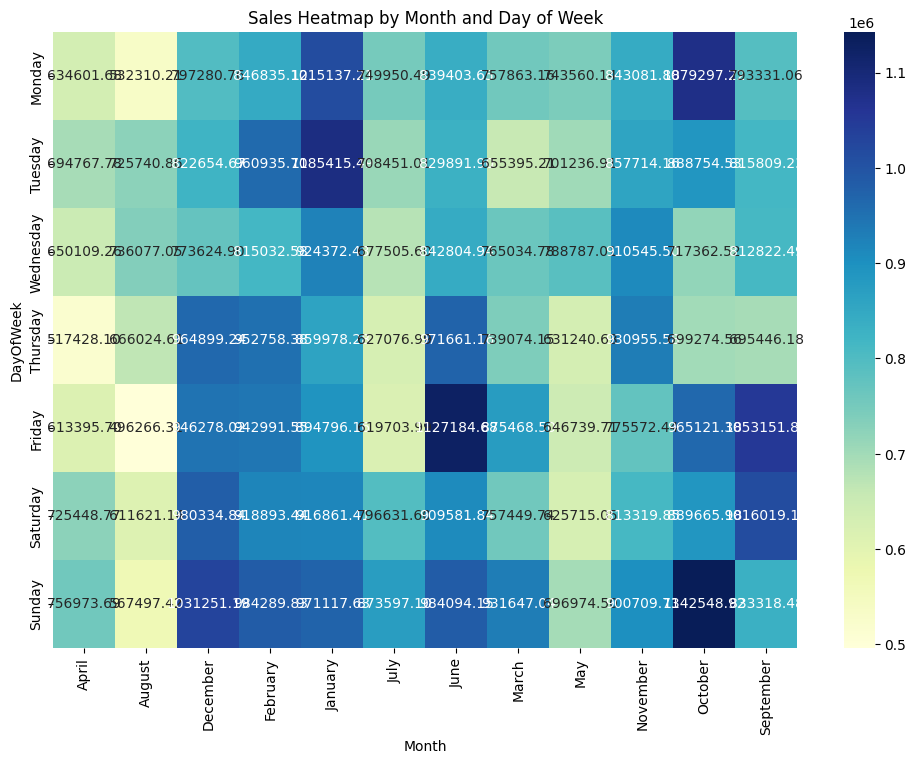

In [31]:
df['Month'] = df['OrderDate'].dt.month_name()
heatmap_data = df.pivot_table(values='Revenue', index='DayOfWeek', columns='Month', aggfunc='sum', fill_value=0)
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Sales Heatmap by Month and Day of Week')
plt.show()

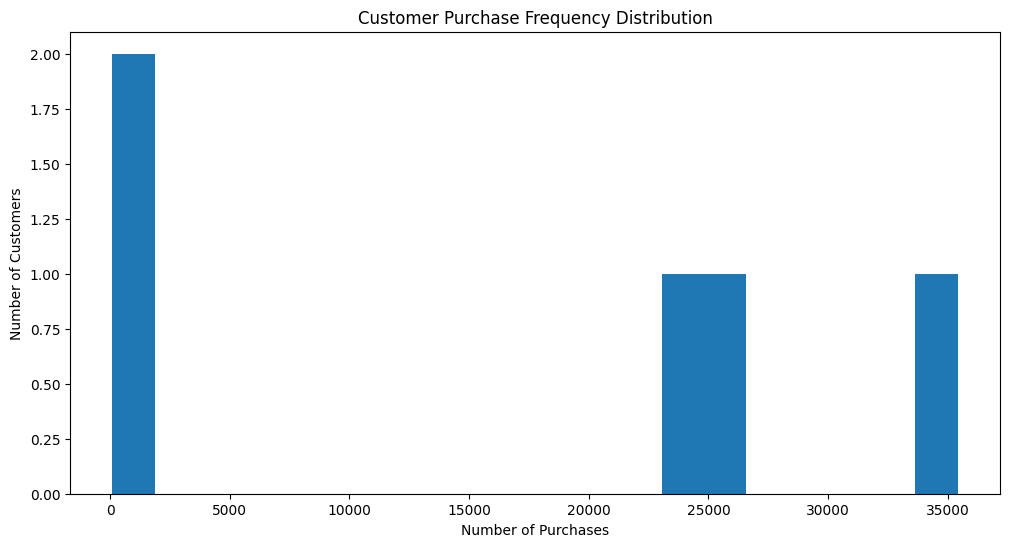

In [32]:
customer_purchase_freq = df.groupby('account_id')['SubOrderNo'].nunique()
plt.figure(figsize=(12, 6))
customer_purchase_freq.plot(kind='hist', bins=20)
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Customer Purchase Frequency Distribution')
plt.show()


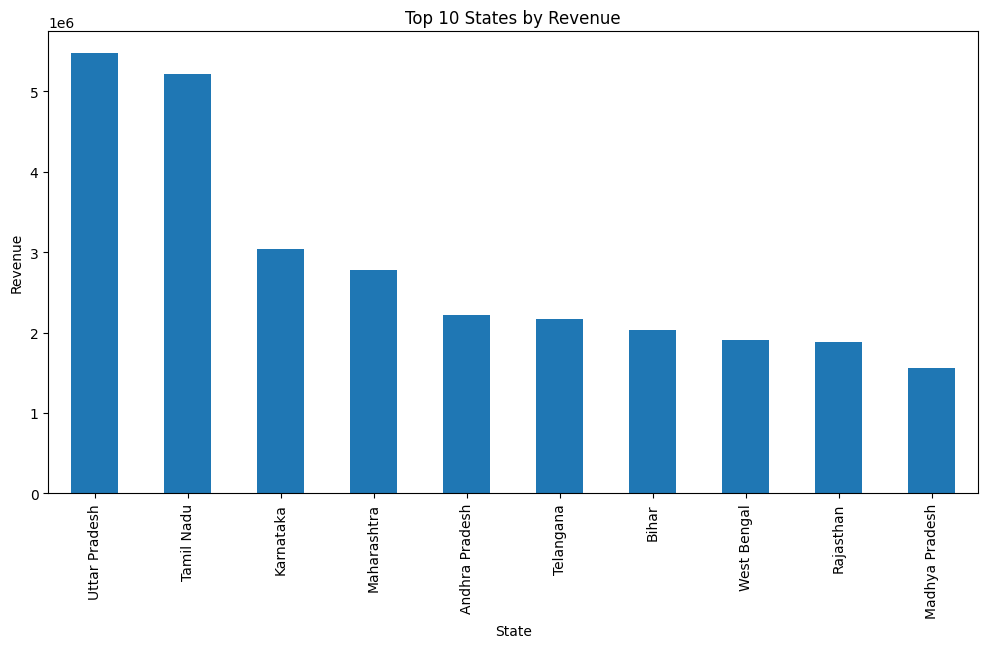

In [33]:
# Group by state and sum the revenue
state_sales = df.groupby('CustomerState')['Revenue'].sum().sort_values(ascending=False)

# Plot the top 10 states by revenue
plt.figure(figsize=(12, 6))
state_sales.head(10).plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.title('Top 10 States by Revenue')
plt.show()


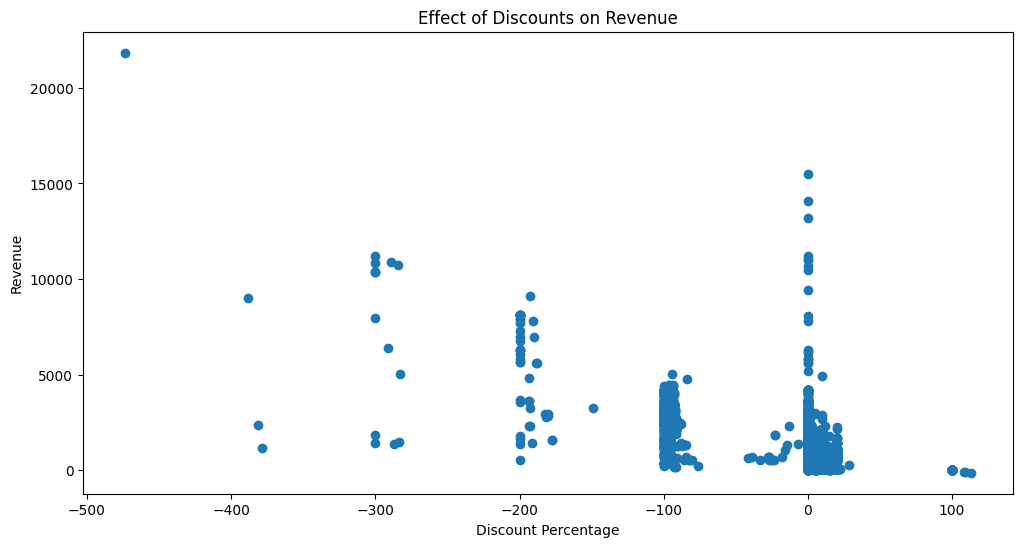

In [35]:
# Calculate the discount percentage
df['DiscountPercentage'] = ((df['SupplierListedPrice'] - df['SupplierDiscountedPrice']) / df['SupplierListedPrice']) * 100

# Plot the relationship between discount percentage and revenue
plt.figure(figsize=(12, 6))
plt.scatter(df['DiscountPercentage'], df['Revenue'])
plt.xlabel('Discount Percentage')
plt.ylabel('Revenue')
plt.title('Effect of Discounts on Revenue')
plt.show()


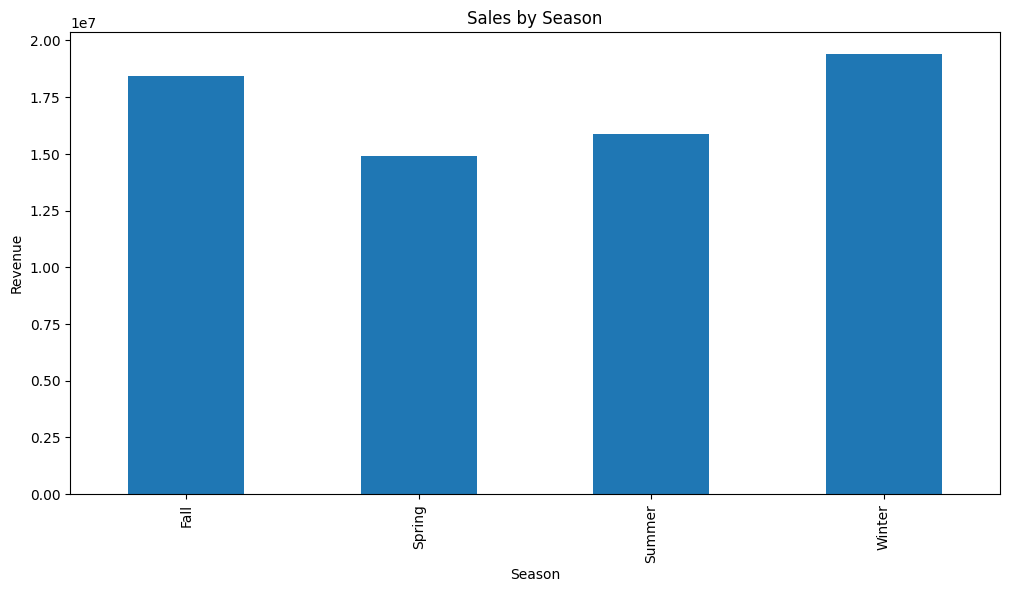

In [37]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['OrderDate'].apply(get_season)
season_sales = df.groupby('Season')['Revenue'].sum()

plt.figure(figsize=(12, 6))
season_sales.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.title('Sales by Season')
plt.show()

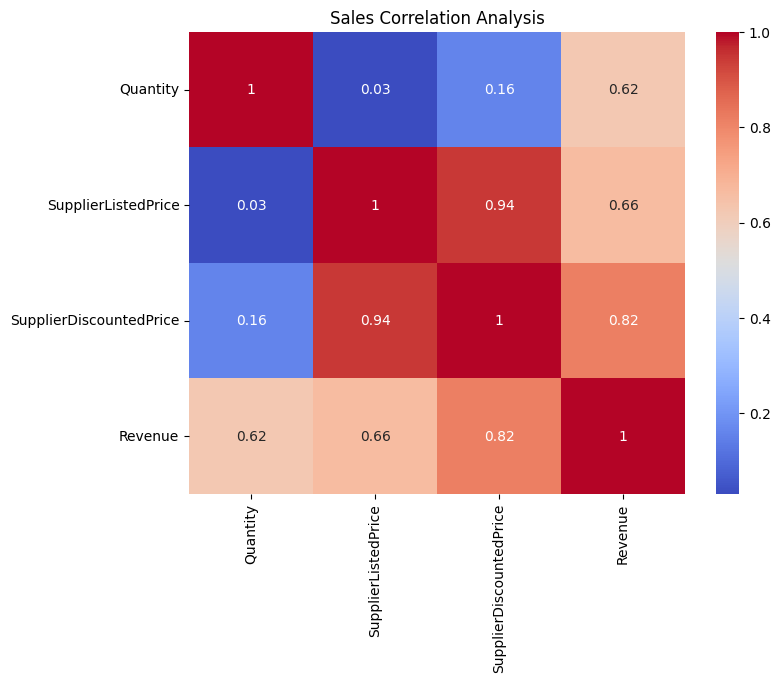

In [38]:

numerical_columns = df[['Quantity', 'SupplierListedPrice', 'SupplierDiscountedPrice', 'Revenue']]

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Sales Correlation Analysis')
plt.show()
